In [20]:
#!pip install fullcontrol
#!pip install ipympl
#!pip install matplotlib
import fullcontrol as fc

In [30]:
stepGcode = "SET_GCODE_OFFSET Z_ADJUST=+0.005 MOVE=1"
steps_count = 10
printerWidth = 220
printerDepth = 220
stripHeight = 40
stripWidthLines = 24

In [31]:
design_name = 'leveling'
nozzle_temp = 210
bed_temp = 60
print_speed = 1000
fan_percent = 100
printer_name='ender_3' # generic / ultimaker2plus / prusa_i3 / ender_3 / cr_10 / bambulab_x1 / toolchanger_T0

In [32]:
EW = 0.4 # extrusion width
EH = 0.2 # extrusion height (and layer height)

In [33]:
steps = []

initialX = int(printerWidth / 2) - EW * stripWidthLines * int(steps_count / 2)
initialY = int(printerDepth / 2) # we will print 40x line

steps.append(fc.Extruder(on=False))
steps.append(fc.Point(x=initialX, y=initialY, z=EH))
steps.append(fc.Extruder(on=True))

for step in range(steps_count):
    for line in range(int(stripWidthLines / 2)):
        x = initialX + (step * stripWidthLines + line * 2) * EW
        steps.append(fc.Point(x=x, y=initialY - stripHeight, z=EH))
        steps.append(fc.Point(x=x + EW, y=initialY - stripHeight, z=EH))
        steps.append(fc.Point(x=x + EW, y=initialY, z=EH))
        steps.append(fc.Point(x=x + EW * 2, y=initialY, z=EH))
    if step != steps_count - 1:
        steps.append(fc.Point(x=initialX + (step + 1) * stripWidthLines * EW, y=initialY + 4, z=EH))
        steps.append(fc.ManualGcode(text=stepGcode))



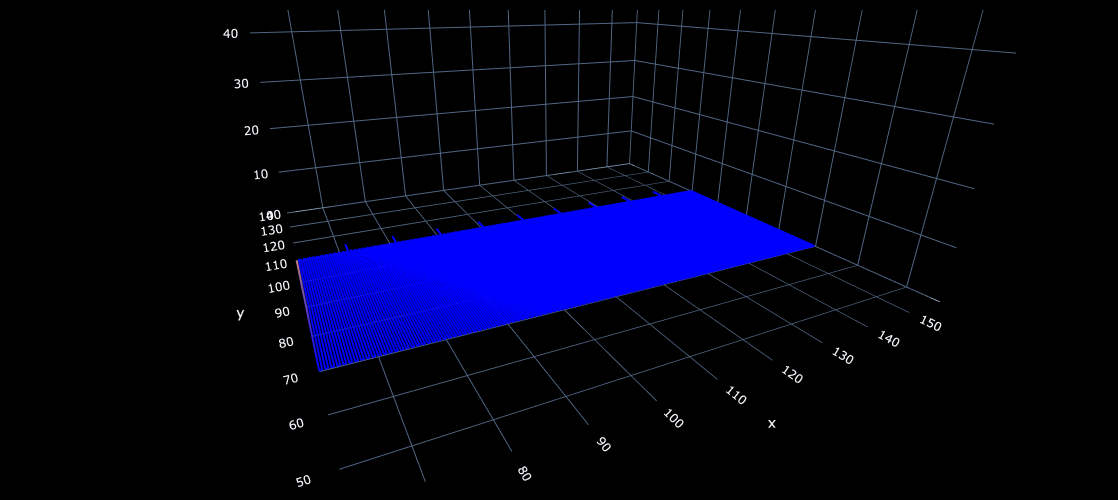

In [34]:
fc.transform(steps, 'plot', fc.PlotControls(style='line'))

In [16]:
gcode_controls = fc.GcodeControls(
    printer_name='ender_3',
    save_as='leveling',
    initialization_data={
        'primer': 'front_lines_then_y',
        'print_speed': 1000,
        'nozzle_temp': 210,
        'bed_temp': 60,
        'fan_percent': 100,
        'extrusion_width': EW,
        'extrusion_height': EH})
gcode = fc.transform(steps, 'gcode', gcode_controls)